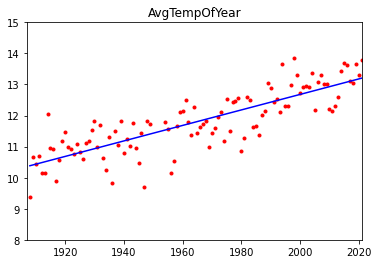

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('seoul.csv')
data = csv.reader(f)
next(data)

avgSum = []
yearAvg = []
year = []

for i in range(1907, 2022):
    for row in data:
        if row[2] != '':
            if int(row[0].split('-')[0]) == i:
                avgSum.append(float(row[2]))
            elif int(row[0].split('-')[0]) != i:
                break
    if len(avgSum) != 0 and len(avgSum) > 350: #6.25기간, 1907년 제외
        yearAvg.append(sum(avgSum)/len(avgSum))
        year.append(i)
        avgSum.clear()

plt.title("AvgTempOfYear")       
plt.plot(year, yearAvg, 'r.')

fit_line = np.polyfit(year, yearAvg, 1)#1: 1차원
X = np.array([min(year), max(year)]) # 시작과 끝 X 좌표
Y = X * fit_line[0] + fit_line[1] # 시작과 끝 Y 좌표
# 근사치: y = 2.5x -3.7
plt.plot(X, Y, 'b')

plt.axis([1907,2021,8,15])
plt.show()